In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv("diabetes.csv")
print(diabetes.head())
X = diabetes.iloc[:,:-1]
Y = diabetes.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train1 = [X_train,y_train]
train1 = pd.concat(train1,axis=1)
test1 = [X_test,y_test]
test1 = pd.concat(test1,axis=1)
test1 = test1.values.tolist()
train1 = train1.values.tolist()

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [3]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(train_set, test_set, algorithm, n_folds, *args):
    scores = list()
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in test_set]
#     for i in range(len(actual)):
#         print("Expected=%d, Predicted=%d" % (actual[i], predicted[i]))
#     print(confusion_matrix(actual,predicted))
#     print(classification_report(actual,predicted))
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
    return scores

# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation +=  weights[i] * row[i]
    return 1 if activation > 0 else 0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [1 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] += l_rate * error
            for i in range(len(row)-1):
                 weights[i] += l_rate * error * row[i]
#         print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, error))
    return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
#     weights = np.random.rand(8)
    weights = train_weights(train, l_rate, n_epoch)
#     print(weights)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)

# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 300
scores = evaluate_algorithm(train1, test1, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Accuracy: %.3f%%' % (scores[0]))

Scores: [72.07792207792207]
Accuracy: 72.078%


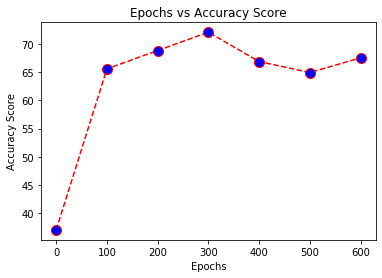

In [4]:
n_folds = 3
l_rate = 0.01
n_epoch = 300

s = []
e = []
for i in range(0,601,100):
    scores = evaluate_algorithm(train1,test1, perceptron, n_folds, l_rate, i)
    s.append(scores)
    e.append(i)
       
plt.plot(e,s,marker='o',linestyle='dashed',color='red',markerfacecolor='blue',markersize=10)
plt.title('Epochs vs Accuracy Score')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.show()